In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read and check the data
cancer = pd.read_csv('../Resources/data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Clean data
cancer = cancer.iloc[:,:-1]
cancer = cancer.drop(cancer.columns[[0]], axis=1) 
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# K Nearest Neighbors methodology

In [4]:
# Ref: 21-2-6
# Data Pre Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
target = cancer["diagnosis"]
data = cancer.drop("diagnosis", axis=1)
feature_names = data.columns
data.head()

Using TensorFlow backend.


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.930
k: 3, Train/Test Score: 0.951/0.930
k: 5, Train/Test Score: 0.934/0.965
k: 7, Train/Test Score: 0.937/0.958
k: 9, Train/Test Score: 0.934/0.958
k: 11, Train/Test Score: 0.934/0.979
k: 13, Train/Test Score: 0.925/0.972
k: 15, Train/Test Score: 0.923/0.965
k: 17, Train/Test Score: 0.925/0.965
k: 19, Train/Test Score: 0.920/0.965
k: 21, Train/Test Score: 0.918/0.965
k: 23, Train/Test Score: 0.918/0.965
k: 25, Train/Test Score: 0.915/0.951
k: 27, Train/Test Score: 0.918/0.951
k: 29, Train/Test Score: 0.915/0.951
k: 31, Train/Test Score: 0.915/0.951
k: 33, Train/Test Score: 0.913/0.944
k: 35, Train/Test Score: 0.915/0.944
k: 37, Train/Test Score: 0.918/0.944
k: 39, Train/Test Score: 0.913/0.951
k: 41, Train/Test Score: 0.911/0.951
k: 43, Train/Test Score: 0.911/0.944
k: 45, Train/Test Score: 0.911/0.951
k: 47, Train/Test Score: 0.911/0.951
k: 49, Train/Test Score: 0.904/0.944


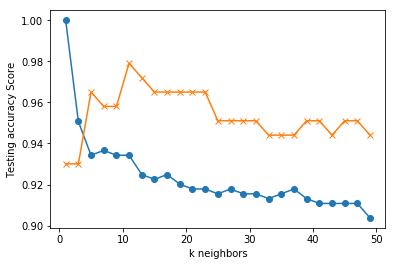

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.958


# Deep Learning Methodology_#Relu

In [8]:
X = cancer.drop("diagnosis", axis=1)
y = cancer["diagnosis"]
print(X.shape, y.shape)

(569, 30) (569,)


In [56]:
# Create a Deep Learning Model
from keras.models import Sequential
from keras.layers import Dense

In [57]:
# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [58]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=30))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [14]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
 - 0s - loss: 0.5541 - acc: 0.7066
Epoch 2/60
 - 0s - loss: 0.2582 - acc: 0.9343
Epoch 3/60
 - 0s - loss: 0.1568 - acc: 0.9648
Epoch 4/60
 - 0s - loss: 0.1131 - acc: 0.9789
Epoch 5/60
 - 0s - loss: 0.0883 - acc: 0.9836
Epoch 6/60
 - 0s - loss: 0.0751 - acc: 0.9859
Epoch 7/60
 - 0s - loss: 0.0660 - acc: 0.9883
Epoch 8/60
 - 0s - loss: 0.0594 - acc: 0.9883
Epoch 9/60
 - 0s - loss: 0.0538 - acc: 0.9883
Epoch 10/60
 - 0s - loss: 0.0496 - acc: 0.9930
Epoch 11/60
 - 0s - loss: 0.0459 - acc: 0.9930
Epoch 12/60
 - 0s - loss: 0.0424 - acc: 0.9930
Epoch 13/60
 - 0s - loss: 0.0397 - acc: 0.9930
Epoch 14/60
 - 0s - loss: 0.0367 - acc: 0.9930
Epoch 15/60
 - 0s - loss: 0.0344 - acc: 0.9930
Epoch 16/60
 - 0s - loss: 0.0304 - acc: 0.9930
Epoch 17/60
 - 0s - loss: 0.0296 - acc: 0.9930
Epoch 18/60
 - 0s - loss: 0.0269 - acc: 0.9930
Epoch 19/60
 - 0s - loss: 0.0249 - acc: 0.9930
Epoch 20/60
 - 0s - loss: 0.0233 - acc: 0.9953
Epoch 21/60
 - 0s - loss: 0.0215 - acc: 0.9953
Epoch 22/60
 - 0s - lo

In [15]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.12330031737144748, Accuracy: 0.972027972027972


# Deep Learning Methodology_#Sigmoid


In [18]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='sigmoid', input_dim=30))
model.add(Dense(units=50, activation='sigmoid'))
model.add(Dense(units=2, activation='softmax'))

In [19]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
426/426 [==============================] - 0s 768us/step - loss: 0.6366 - acc: 0.6338
Epoch 2/60
426/426 [==============================] - 0s 79us/step - loss: 0.5346 - acc: 0.6761
Epoch 3/60
426/426 [==============================] - 0s 83us/step - loss: 0.4346 - acc: 0.8826
Epoch 4/60
426/426 [==============================] - 0s 86us/step - loss: 0.3484 - acc: 0.9202
Epoch 5/60
426/426 [==============================] - 0s 91us/step - loss: 0.2771 - acc: 0.9272
Epoch 6/60
426/426 [==============================] - 0s 87us/step - loss: 0.2252 - acc: 0.9413
Epoch 7/60
426/426 [==============================] - 0s 85us/step - loss: 0.1861 - acc: 0.9460
Epoch 8/60
426/426 [==============================] - 0s 77us/step - loss: 0.1589 - acc: 0.9531
Epoch 9/60
426/426 [==============================] - 0s 89us/step - loss: 0.1383 - acc: 0.9601
Epoch 10/60
426/426 [==============================] - 0s 68us/step - loss: 0.1228 - acc: 0.9695
Epoch 11/60
426/426 [=================

In [20]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}, Testing: {model}")

Normal Neural Network - Loss: 0.07555320741725968, Accuracy: 0.9790209790209791


# Deep Learning Methodology_#Linear

In [23]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='linear', input_dim=30))
model.add(Dense(units=50, activation='linear'))
model.add(Dense(units=2, activation='softmax'))

In [24]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

In [25]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.18896039310931081, Accuracy: 0.958041958041958


# Deep Learning Methodology_#Tanh

In [27]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='tanh', input_dim=30))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=2, activation='softmax'))

In [28]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
426/426 [==============================] - 0s 919us/step - loss: 0.5362 - acc: 0.7207
Epoch 2/60
426/426 [==============================] - 0s 85us/step - loss: 0.1833 - acc: 0.9507
Epoch 3/60
426/426 [==============================] - 0s 84us/step - loss: 0.1163 - acc: 0.9718
Epoch 4/60
426/426 [==============================] - 0s 84us/step - loss: 0.0927 - acc: 0.9789
Epoch 5/60
426/426 [==============================] - 0s 87us/step - loss: 0.0785 - acc: 0.9836
Epoch 6/60
426/426 [==============================] - 0s 85us/step - loss: 0.0713 - acc: 0.9836
Epoch 7/60
426/426 [==============================] - 0s 79us/step - loss: 0.0653 - acc: 0.9859
Epoch 8/60
426/426 [==============================] - 0s 70us/step - loss: 0.0616 - acc: 0.9859
Epoch 9/60
426/426 [==============================] - 0s 69us/step - loss: 0.0579 - acc: 0.9883
Epoch 10/60
426/426 [==============================] - 0s 62us/step - loss: 0.0555 - acc: 0.9883
Epoch 11/60
426/426 [=================

In [29]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.09968050138452343, Accuracy: 0.972027972027972


# Decision Tree (C4.5)

In [30]:
#Ref: 21-2-4
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.90209790209790208

In [31]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
target_names = ["Benign", "Malignant"]
feature_names = data.columns
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')

graph = graphviz.Source(dot_data)  
graph 

InvocationException: GraphViz's executables not found

# Naive Bayes (NB) 

In [32]:
from pyspark.sql import SparkSession

In [34]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(
    X_train,
    y_train
)

GaussianNB(priors=None)

In [35]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9389671361502347
Testing Data Score: 0.951048951048951


# Feature Selection

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_2 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_2, step=1, cv=5,scoring='accuracy') #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])


Optimal number of features : 22
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'texture_se', 'area_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


In [38]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

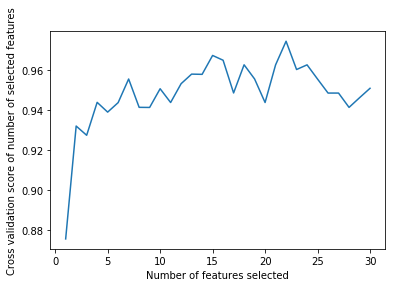

In [54]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# 22 Features were selected

In [41]:
cancer_features= cancer.drop(cancer.columns[[9, 10, 13, 15, 16, 17, 25, 30 ]], axis=1)  

In [42]:
X = cancer_features.drop("diagnosis", axis=1)
y = cancer["diagnosis"]
print(X.shape, y.shape)

(569, 22) (569,)


In [43]:
# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [46]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=22))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [47]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
426/426 [==============================] - 0s 1ms/step - loss: 0.4559 - acc: 0.8052
Epoch 2/60
426/426 [==============================] - 0s 84us/step - loss: 0.2253 - acc: 0.9554
Epoch 3/60
426/426 [==============================] - 0s 79us/step - loss: 0.1506 - acc: 0.9624
Epoch 4/60
426/426 [==============================] - 0s 77us/step - loss: 0.1140 - acc: 0.9765
Epoch 5/60
426/426 [==============================] - 0s 86us/step - loss: 0.0933 - acc: 0.9812
Epoch 6/60
426/426 [==============================] - 0s 86us/step - loss: 0.0790 - acc: 0.9859
Epoch 7/60
426/426 [==============================] - 0s 77us/step - loss: 0.0694 - acc: 0.9883
Epoch 8/60
426/426 [==============================] - 0s 104us/step - loss: 0.0619 - acc: 0.9859
Epoch 9/60
426/426 [==============================] - 0s 81us/step - loss: 0.0560 - acc: 0.9859
Epoch 10/60
426/426 [==============================] - ETA: 0s - loss: 0.0448 - acc: 1.000 - 0s 78us/step - loss: 0.0506 - acc: 0.9906
E

In [48]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


Normal Neural Network - Loss: 0.09953111227585688, Accuracy: 0.9790209790209791


# Deep Learning #Sigmoid

In [51]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='sigmoid', input_dim=22))
model.add(Dense(units=50, activation='sigmoid'))
model.add(Dense(units=2, activation='softmax'))

In [52]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
426/426 [==============================] - 0s 1ms/step - loss: 0.6100 - acc: 0.6268
Epoch 2/60
426/426 [==============================] - 0s 81us/step - loss: 0.4988 - acc: 0.7582
Epoch 3/60
426/426 [==============================] - 0s 78us/step - loss: 0.4004 - acc: 0.9178
Epoch 4/60
426/426 [==============================] - 0s 69us/step - loss: 0.3145 - acc: 0.9366
Epoch 5/60
426/426 [==============================] - 0s 76us/step - loss: 0.2461 - acc: 0.9484
Epoch 6/60
426/426 [==============================] - 0s 78us/step - loss: 0.1986 - acc: 0.9507
Epoch 7/60
426/426 [==============================] - 0s 89us/step - loss: 0.1675 - acc: 0.9624
Epoch 8/60
426/426 [==============================] - 0s 89us/step - loss: 0.1448 - acc: 0.9718
Epoch 9/60
426/426 [==============================] - 0s 98us/step - loss: 0.1298 - acc: 0.9789
Epoch 10/60
426/426 [==============================] - 0s 101us/step - loss: 0.1169 - acc: 0.9812
Epoch 11/60
426/426 [==================

In [53]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.06917847549848884, Accuracy: 0.9790209790209791
